### Exercise 5.1

<br>

1) Read the attached file "bank.csv" in the CSV file using pandas. Pay attention to the file delimeter. Inspect the resulting dataframe with respect to the column names and the variable types.

2) Pick data from the following columns to a second dataframe `df2`: `y`, `job`, `marital`, `default`, `housing`, `poutcome`.

3) Convert categorical variables to dummy numerical values using the command

`df3 = pd.get_dummies(df2,columns=['job','marital','default','housing','poutcome'])`

4) Produce a heat map of correlation coefficients for all variables in `df3`. Describe the amount of correlation between the variables in your own words.

5) Select the column called `y` of `df3` as the target variable `y`, and all the remaining columns for the explanatory variables `X`.

6) Split the dataset into training and testing sets with 75/25  ratio.

7) Setup a logistic regression model, train it with training data and predict on testing data.

8) Print the confusion matrix (or use heat map if you want) and accuracy score for the logistic regression model.


### Exercise 5.2

Consider the data from CSV file `weight-height.csv`.

1) Read data into a pandas dataframe.

2) Pick the target variable `y` as weight in kilograms, and the feature variable `X` as height in centimeters.

3) Split the data into training and testing sets with 80/20 ratio.

4) Scale the training and testing data using normalization and standardization.

5) Fit a KNN regression model with `k=5` to the training data without scaling, predict on unscaled testing data and compute the $R^2$ value.



Columns in dataset:
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

Data types:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

Selected columns preview:
    y          job  marital default housing poutcome
0  no   unemployed  married      no      no  unknown
1  no     services  married      no     yes  failure
2  no   management   single      no     yes  failure
3  no   management  married      no     yes  unknown
4  no  blue-collar  married      no     yes  unknown

After dummy conversion:
   y_no  y_yes  job_admin.  job

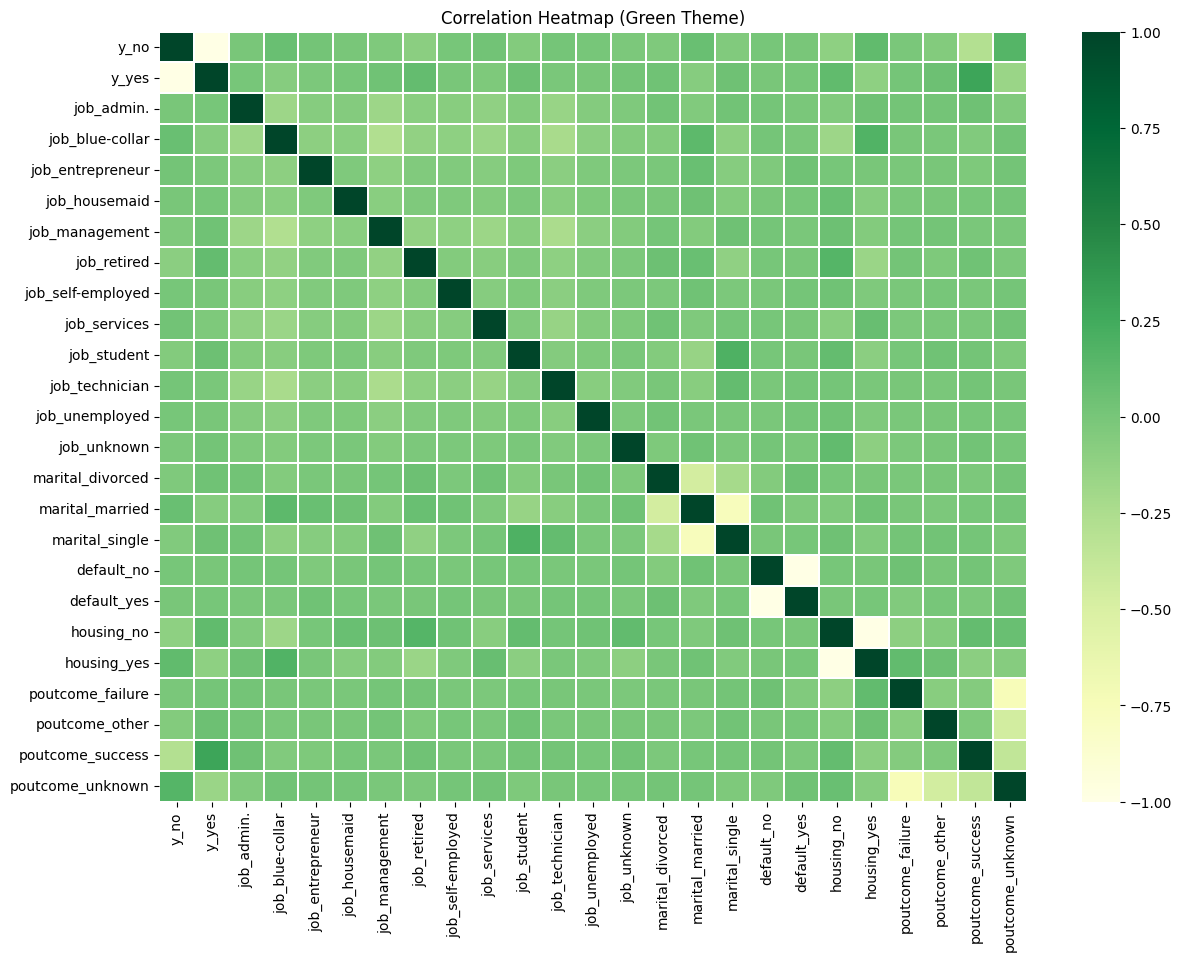


Confusion Matrix:
[[987  14]
 [109  21]]
Accuracy Score: 0.8912466843501327


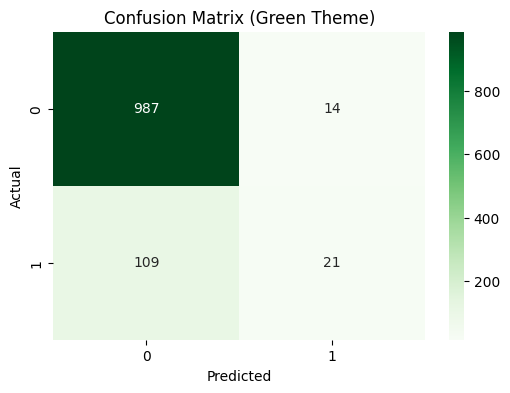

In [3]:
#Exercise 5.1

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

bank = pd.read_csv("bank.csv", sep=";")

print("Columns in dataset:")
print(bank.columns)
print("\nData types:")
print(bank.dtypes)


df_sub = bank[['y', 'job', 'marital', 'default', 'housing', 'poutcome']]

print("\nSelected columns preview:")
print(df_sub.head())


df_dummy = pd.get_dummies(
    df_sub,
    columns=['y', 'job', 'marital', 'default', 'housing', 'poutcome'],
    drop_first=False
)

print("\nAfter dummy conversion:")
print(df_dummy.head())


plt.figure(figsize=(14, 10))
sns.heatmap(df_dummy.corr(), cmap="YlGn", linewidths=0.1)
plt.title("Correlation Heatmap (Green Theme)")
plt.show()


target = df_dummy['y_yes']
features = df_dummy.drop(['y_yes', 'y_no'], axis=1)


X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.25, random_state=10
)


log_model = LogisticRegression(max_iter=1500)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("\nConfusion Matrix:")
print(cm)
print("Accuracy Score:", acc)


plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix (Green Theme)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



In [6]:
# Exercise 5.2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

df = pd.read_csv("weight-height.csv")

df["Height_cm"] = df["Height"] * 2.54
df["Weight_kg"] = df["Weight"] * 0.453592

X = df[["Height_cm"]]
y = df["Weight_kg"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=10
)

minmax = MinMaxScaler()
X_train_norm = minmax.fit_transform(X_train)
X_test_norm = minmax.transform(X_test)

std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(r2_score(y_test, y_pred))



0.8348327027532895
